In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score, 
    roc_curve
)



from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm



import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [2]:
df1 = pd.read_parquet(r"D:\T24\Yeasin's Model\Dataset\NB15BIN.parquet")
print(f"Dataset Shape: {df1.shape}")
display(df1.head(10))

Dataset Shape: (257673, 43)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000002,0.901515,0.083333,0.50,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.523046e-02,0.000000,0.000000,0.000000,5.926172e-08,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022297,0.000000,0.000000,0.000000,0.193548,0.333333,0.137931,0.137931,0.177778,0.187500,0.0,0.0,0.000000,0.135593,0.196721,0.0,1
1,0.000001,0.901515,0.083333,0.50,0.000094,0.000000,0.000006,0.000000,0.333333,0.996078,0.000000,2.538410e-02,0.000000,0.000000,0.000000,3.555703e-08,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022297,0.000000,0.000000,0.000000,0.241935,0.333333,0.258621,0.258621,0.333333,0.234375,0.0,0.0,0.000000,0.271186,0.245902,0.0,1
2,0.425646,0.856061,1.000000,0.00,0.000470,0.000182,0.000069,0.000006,0.000006,0.243137,0.992126,9.657451e-07,0.000013,0.000376,0.000182,2.767722e-03,1.731925e-08,0.009217,0.000000,1.0,0.348600,0.793395,1.0,0.245981,0.173639,0.129649,0.097973,0.028667,0.000000,0.000000,0.016129,0.500000,0.000000,0.000000,0.000000,0.015625,0.0,0.0,0.000000,0.016949,0.016393,0.0,0
3,0.177350,0.856061,0.333333,0.25,0.000845,0.000726,0.000054,0.000107,0.000035,0.243137,0.992126,1.974548e-06,0.001006,0.000376,0.000363,6.406653e-04,1.038435e-03,0.001823,0.000178,1.0,0.023713,0.182875,1.0,0.036272,0.020449,0.024798,0.037838,0.130667,0.005814,0.000057,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.000000,0.000000,0.0,1
4,0.026301,0.901515,1.000000,0.00,0.000282,0.000363,0.000038,0.000021,0.000097,0.121569,0.114173,7.888593e-06,0.001157,0.000000,0.000000,2.213346e-04,4.078278e-04,0.000018,0.000072,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.079730,0.052000,0.000000,0.000000,0.096774,0.000000,0.068966,0.000000,0.000000,0.062500,0.0,0.0,0.000000,0.016949,0.114754,0.0,0
5,0.284195,0.856061,1.000000,0.25,0.001597,0.000545,0.000876,0.000018,0.000030,0.996078,0.992126,2.039217e-05,0.000103,0.001128,0.000182,5.131458e-04,2.494377e-03,0.002214,0.000439,1.0,0.277941,0.988529,1.0,0.024860,0.018424,0.012139,0.456757,0.030000,0.000000,0.000000,0.048387,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.016949,0.000000,0.0,1
6,0.362704,0.856061,1.000000,0.25,0.000845,0.000545,0.000039,0.000018,0.000015,0.996078,0.992126,7.130353e-07,0.000080,0.000376,0.000182,1.098001e-03,3.220216e-03,0.003513,0.000592,1.0,0.870791,0.448161,1.0,0.032174,0.020223,0.019700,0.023649,0.030000,0.000000,0.000000,0.032258,0.166667,0.000000,0.000000,0.000000,0.031250,0.0,0.0,0.000000,0.016949,0.081967,0.0,0
7,0.000003,0.901515,0.083333,0.50,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,0.000000,0.000000,1.066711e-07,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022297,0.000000,0.000000,0.000000,0.274194,0.333333,0.293103,0.293103,0.377778,0.265625,0.0,0.0,0.000000,0.288136,0.278689,0.0,1
8,0.268546,0.856061,0.333333,0.25,0.000845,0.000545,0.000059,0.000018,0.000020,0.996078,0.992126,1.427333e-06,0.000108,0.000376,0.000182,9.345007e-04,2.362532e-03,0.003224,0.000504,1.0,0.505213,0.815502,1.0,0.033665,0.016915,0.025290,0.042568,0.030000,0.005814,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.000000,0.000000,0.0,1
9,0.000003,0.901515,0.083333,0.50,0.000094,0.000000,0.000006,0.000000,0.125000,0.996078,0.000000,9.519038e-03,0.000000,0.000000,0.000000,9.481876e-08,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022297,0.000000,0.000000,0.000000,0.387097,0.333333,0.275862,0.275862,0.355556,0.375000,0.0,0.0,0.000000,0.2711

In [3]:
class_distribution = df1['label'].value_counts()
null_values = df1.isnull().sum()
duplicate_values = df1.duplicated().sum()

print(f'Class Distribution:\n{class_distribution}, \nNull Values in Each Column:\n{null_values}, \nNumber of Duplicate Rows:\n{duplicate_values}')

df2 = df1.drop_duplicates()
print({df1.shape})
df2['label'].value_counts()


Class Distribution:
label
1    164673
0     93000
Name: count, dtype: int64, 
Null Values in Each Column:
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd    

label
0    85721
1    68376
Name: count, dtype: int64

In [4]:
x = df2.drop(columns=["dur", "proto", "service", "state", "label"])  
y = df2["label"].values


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)



In [5]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=20)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)

X_test_chi2 = chi2_selector.transform(X_test)

selected_features = chi2_selector.get_feature_names_out()
print(f"Selected features: {selected_features}")

Selected features: ['sbytes' 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sinpkt' 'tcprtt' 'synack'
 'ackdat' 'smean' 'dmean' 'ct_srv_src' 'ct_state_ttl' 'ct_src_dport_ltm'
 'ct_dst_sport_ltm' 'ct_dst_src_ltm' 'ct_flw_http_mthd' 'ct_srv_dst'
 'is_sm_ips_ports']


In [6]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_chi2, y_train)

X_test_final = X_test_chi2
y_test_final = y_test

print(f"After SMOTE - Training set shape: {X_train_smote.shape}")
print(f"Class distribution after SMOTE: {np.bincount(y_train_smote)}")

After SMOTE - Training set shape: (137152, 20)
Class distribution after SMOTE: [68576 68576]


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_BiGRU_Attn_Model(nn.Module):
    def __init__(self, input_channels, seq_len, num_features, hidden_size=32, dropout_rate=0.2, attention_dim=16):
        super(CNN_BiGRU_Attn_Model, self).__init__()
        
        # Conv1D layer - treating 20 features as sequence length
        # Input will be [B, 1, 20] where 1 is the channel and 20 is sequence length
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1)
        self.batch_norm = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.relu = nn.ReLU()
        
        # Calculate sequence length after conv and pooling
        # With padding=1 and kernel_size=3, sequence length stays same after conv
        # After pooling with kernel_size=2: seq_len//2
        self.pooled_len = seq_len // 2  # 20 // 2 = 10
        
        # BiGRU layer
        self.bigru = nn.GRU(
            input_size=32,  # CNN output channels
            hidden_size=hidden_size, 
            batch_first=True, 
            bidirectional=True
        )
        
        # Lightweight Attention Mechanism
        self.attention_dim = attention_dim
        bigru_output_dim = hidden_size * 2  # bidirectional
        
        # Attention components
        self.attention_query = nn.Linear(bigru_output_dim, attention_dim, bias=False)
        self.attention_key = nn.Linear(bigru_output_dim, attention_dim, bias=False)
        self.attention_value = nn.Linear(bigru_output_dim, bigru_output_dim, bias=False)
        
        # Attention scale factor for stability
        self.scale = torch.sqrt(torch.tensor(attention_dim, dtype=torch.float32))
        
        # Classification layers
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(bigru_output_dim, 25)
        self.fc2 = nn.Linear(25, 1)
        
        # Xavier initialization
        self._initialize_weights()
    
    def forward(self, x):
        batch_size = x.size(0)
        
        # Input expected: [B, 1, 20] (from data preparation)
        # This is already in the correct format for Conv1D: [batch, channels, sequence_length]
        
        # Apply Conv1D
        x = self.conv1(x)       # [B, 32, 20] (with padding=1, length stays same)
        x = self.batch_norm(x)
        x = self.relu(x)
        x = self.pool(x)        # [B, 32, 10] (20//2=10)
        
        # Prepare for BiGRU: [B, seq_len, features]
        x = x.permute(0, 2, 1)  # [B, 10, 32]
        
        # BiGRU processing
        gru_output, _ = self.bigru(x)  # [B, 10, hidden_size*2]
        
        # Lightweight Self-Attention
        attention_weights = self.compute_attention(gru_output)
        
        # Apply attention to get context vector
        context = torch.sum(attention_weights.unsqueeze(-1) * gru_output, dim=1)  # [B, hidden_size*2]
        
        # Classification - No sigmoid for BCEWithLogitsLoss
        x = self.dropout(context)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x
    
    def compute_attention(self, gru_output):
        """
        Lightweight self-attention mechanism
        Args:
            gru_output: [B, L, hidden_size*2]
        Returns:
            attention_weights: [B, L]
        """
        batch_size, seq_len, hidden_dim = gru_output.size()
        
        # Compute query, key, value
        Q = self.attention_query(gru_output)  # [B, L, attention_dim]
        K = self.attention_key(gru_output)    # [B, L, attention_dim]
        V = self.attention_value(gru_output)  # [B, L, hidden_dim]
        
        # Compute attention scores
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale  # [B, L, L]
        
        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=-1)  # [B, L, L]
        
        # Compute attended values
        attended_values = torch.matmul(attention_weights, V)  # [B, L, hidden_dim]
        
        # Global attention pooling - average attention weights across sequence
        global_attention = torch.mean(attention_weights, dim=-1)  # [B, L]
        
        # Normalize global attention
        global_attention = F.softmax(global_attention, dim=-1)
        
        return global_attention
    
    def get_attention_weights(self, x):
        """
        Extract attention weights for interpretability
        """
        with torch.no_grad():
            batch_size = x.size(0)
            
            # Forward pass until attention
            x = self.conv1(x)
            x = self.batch_norm(x)
            x = self.relu(x)
            x = self.pool(x)
            x = x.permute(0, 2, 1)
            
            gru_output, _ = self.bigru(x)
            attention_weights = self.compute_attention(gru_output)
            
            return attention_weights
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.GRU):
                for name, param in m.named_parameters():
                    if 'weight_ih' in name:
                        nn.init.xavier_uniform_(param.data)
                    elif 'weight_hh' in name:
                        nn.init.orthogonal_(param.data)
                    elif 'bias' in name:
                        nn.init.constant_(param.data, 0)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR
import optuna
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def prepare_data_for_training(X_train_smote, y_train_smote, X_test_final, y_test_final):
    X_train_tensor = torch.FloatTensor(X_train_smote).unsqueeze(1)  # Add channel dimension
    y_train_tensor = torch.FloatTensor(y_train_smote).unsqueeze(1)
    X_test_tensor = torch.FloatTensor(X_test_final).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test_final).unsqueeze(1)
    
    # Create train/validation split (90/10 from training data)
    train_size = int(0.9 * len(X_train_tensor))
    val_size = len(X_train_tensor) - train_size
    
    # Random split
    train_dataset = TensorDataset(X_train_tensor[:train_size], y_train_tensor[:train_size])
    val_dataset = TensorDataset(X_train_tensor[train_size:], y_train_tensor[train_size:])
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    return train_dataset, val_dataset, test_dataset

def calculate_class_weights(y_train):
    """
    Calculate class weights for weighted loss
    """
    unique, counts = np.unique(y_train, return_counts=True)
    total_samples = len(y_train)
    
    # Calculate weights inversely proportional to class frequencies
    class_weights = total_samples / (len(unique) * counts)
    
    # For binary classification
    pos_weight = torch.tensor([class_weights[1] / class_weights[0]], dtype=torch.float32)
    return pos_weight

def train_epoch(model, train_loader, criterion, optimizer, device):
    """
    Train for one epoch
    """
    model.train()
    total_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        
        # Gradient clipping for stability
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        total_loss += loss.item()
    
    return total_loss / len(train_loader)

def evaluate_model(model, data_loader, criterion, device):
    """
    Evaluate model on validation set
    """
    model.eval()
    total_loss = 0
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            
            # FIXED: For BCEWithLogitsLoss, apply sigmoid to logits
            predictions = torch.sigmoid(output) > 0.5
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    # Calculate metrics
    accuracy = accuracy_score(all_targets, all_predictions)
    f1 = f1_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, zero_division=0)
    recall = recall_score(all_targets, all_predictions, zero_division=0)
    
    # Calculate FPR
    tn, fp, fn, tp = confusion_matrix(all_targets, all_predictions).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    avg_loss = total_loss / len(data_loader)
    
    return avg_loss, accuracy, f1, precision, recall, fpr

def objective(trial, train_dataset, val_dataset, y_train_smote):
    """
    Optuna objective function - FIXED: Added required parameters
    """
    # Hyperparameter search space
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    hidden_size = trial.suggest_int('hidden_size', 16, 128, step=16)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    attention_dim = trial.suggest_int('attention_dim', 8, 64, step=8)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model  
    model = CNN_BiGRU_Attn_Model(
        input_channels=1, 
        seq_len=20,  # 20 features selected by Chi-Square
        num_features=1,  # 1 channel for Conv1D
        hidden_size=hidden_size, 
        dropout_rate=dropout_rate, 
        attention_dim=attention_dim
    ).to(device)
    
    # Calculate class weights for weighted loss
    pos_weight = calculate_class_weights(y_train_smote).to(device)
    
    # FIXED: Use BCEWithLogitsLoss (no sigmoid in model)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    
    # Optimizer and scheduler
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = StepLR(optimizer, step_size=7, gamma=0.7)
    
    # Early stopping parameters
    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0
    
    # Training loop
    epochs = 20
    for epoch in range(epochs):
        # Training
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validation
        val_loss, val_acc, val_f1, val_precision, val_recall, val_fpr = evaluate_model(
            model, val_loader, criterion, device
        )
        
        # Learning rate scheduling
        scheduler.step()
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break
        
        # Report intermediate results to Optuna
        trial.report(val_loss, epoch)
        
        # Pruning unpromising trials
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
    
    return best_val_loss

def train_best_model(best_params, train_dataset, val_dataset, test_dataset, y_train_smote):
    """
    Train final model with best hyperparameters
    """
    print("Training final model with best hyperparameters...")
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=best_params['batch_size'], shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False)
    
    # Initialize model with best parameters
    model = CNN_BiGRU_Attn_Model(
        input_channels=1,
        seq_len=20,
        num_features=1,
        hidden_size=best_params['hidden_size'],
        dropout_rate=best_params['dropout_rate'],
        attention_dim=best_params['attention_dim']
    ).to(device)
    
    # Setup training
    pos_weight = calculate_class_weights(y_train_smote).to(device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = optim.Adam(
        model.parameters(), 
        lr=best_params['lr'], 
        weight_decay=best_params['weight_decay']
    )
    scheduler = StepLR(optimizer, step_size=7, gamma=0.7)
    
    # Training metrics storage
    train_losses = []
    val_losses = []
    val_accuracies = []
    val_f1_scores = []
    
    # Training loop with progress bar
    epochs = 30
    best_val_loss = float('inf')
    best_model_state = None
    
    for epoch in tqdm(range(epochs), desc="Training Final Model"):
        # Training
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validation
        val_loss, val_acc, val_f1, val_precision, val_recall, val_fpr = evaluate_model(
            model, val_loader, criterion, device
        )
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        val_f1_scores.append(val_f1)
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
        
        scheduler.step()
        
        # Print progress
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")
    
    # Load best model
    model.load_state_dict(best_model_state)
    
    # Final evaluation on test set
    test_loss, test_acc, test_f1, test_precision, test_recall, test_fpr = evaluate_model(
        model, test_loader, criterion, device
    )
    
    print(f"\nFinal Test Results:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test FPR: {test_fpr:.4f}")
    
    # Plot training curves
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    
    plt.subplot(1, 3, 2)
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    
    plt.subplot(1, 3, 3)
    plt.plot(val_f1_scores, label='Validation F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.title('Validation F1 Score')
    
    plt.tight_layout()
    plt.show()
    
    return model

# Main execution
def main(X_train_smote, y_train_smote, X_test_final, y_test_final):
    # Prepare data
    train_dataset, val_dataset, test_dataset = prepare_data_for_training(
        X_train_smote, y_train_smote, X_test_final, y_test_final
    )
    
    # Run Optuna optimization
    print("Starting hyperparameter optimization...")
    study = optuna.create_study(
        direction='minimize',
        pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
    )
    
    # FIXED: Pass required parameters to objective function
    study.optimize(
        lambda trial: objective(trial, train_dataset, val_dataset, y_train_smote), 
        n_trials=200, 
        timeout=7600
    )
    
    # Get best parameters
    best_params = study.best_params
    print(f"\nBest Hyperparameters: {best_params}")
    print(f"Best Validation Loss: {study.best_value:.4f}")
    
    # Train final model
    final_model = train_best_model(best_params, train_dataset, val_dataset, test_dataset, y_train_smote)
    
    # Save the final model
    torch.save(final_model.state_dict(), 'fixed_cnn_bigru_attention_model.pth')
    print("Model saved!")
    
    return final_model


Using device: cuda


In [9]:
train_dataset, val_dataset, test_dataset = prepare_data_for_training(
    X_train_smote, y_train_smote, X_test_final, y_test_final
)

In [10]:
print("Starting hyperparameter optimization...")
study = optuna.create_study(
    direction='minimize',
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
)

study.optimize(
    lambda trial: objective(trial, train_dataset, val_dataset, y_train_smote), 
    n_trials=200, 
    timeout=7600
)

[I 2025-12-07 09:08:39,106] A new study created in memory with name: no-name-3ff75cf4-4bc6-419f-a33d-7472fe0290f0


Starting hyperparameter optimization...


[I 2025-12-07 09:15:14,603] Trial 0 finished with value: 0.17196906066558265 and parameters: {'lr': 0.0008940505688901796, 'batch_size': 16, 'hidden_size': 48, 'dropout_rate': 0.386786263423893, 'attention_dim': 16, 'weight_decay': 7.117519066674992e-06}. Best is trial 0 with value: 0.17196906066558265.
[I 2025-12-07 09:15:57,316] Trial 1 finished with value: 0.20828312191852302 and parameters: {'lr': 0.00036437909946315946, 'batch_size': 64, 'hidden_size': 16, 'dropout_rate': 0.1482080876802722, 'attention_dim': 64, 'weight_decay': 8.49896825024917e-05}. Best is trial 0 with value: 0.17196906066558265.
[I 2025-12-07 09:20:25,811] Trial 2 finished with value: 0.1266167235206856 and parameters: {'lr': 0.0004311073876301542, 'batch_size': 16, 'hidden_size': 128, 'dropout_rate': 0.32038559746704287, 'attention_dim': 56, 'weight_decay': 0.0002446741755495783}. Best is trial 2 with value: 0.1266167235206856.
[I 2025-12-07 09:22:30,356] Trial 3 finished with value: 0.205130287796952 and para

In [11]:
best_params = study.best_params
print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Validation Loss: {study.best_value:.4f}")


Best Hyperparameters: {'lr': 0.00031876433341134755, 'batch_size': 64, 'hidden_size': 80, 'dropout_rate': 0.2346230756580247, 'attention_dim': 16, 'weight_decay': 2.12097404752332e-05}
Best Validation Loss: 0.0845


Training final model with best hyperparameters...


Training Final Model:  17%|█▋        | 5/30 [00:31<02:40,  6.41s/it]

Epoch 5/30: Train Loss: 0.2477, Val Loss: 0.2130, Val Acc: 0.8713, Val F1: 0.9312


Training Final Model:  33%|███▎      | 10/30 [01:04<02:09,  6.48s/it]

Epoch 10/30: Train Loss: 0.2211, Val Loss: 0.3252, Val Acc: 0.8131, Val F1: 0.8969


Training Final Model:  50%|█████     | 15/30 [01:35<01:32,  6.17s/it]

Epoch 15/30: Train Loss: 0.2116, Val Loss: 0.2126, Val Acc: 0.8625, Val F1: 0.9262


Training Final Model:  67%|██████▋   | 20/30 [02:05<01:01,  6.17s/it]

Epoch 20/30: Train Loss: 0.2093, Val Loss: 0.2368, Val Acc: 0.8572, Val F1: 0.9231


Training Final Model:  83%|████████▎ | 25/30 [02:35<00:30,  6.13s/it]

Epoch 25/30: Train Loss: 0.2061, Val Loss: 0.2067, Val Acc: 0.8704, Val F1: 0.9307


Training Final Model: 100%|██████████| 30/30 [03:06<00:00,  6.20s/it]

Epoch 30/30: Train Loss: 0.2039, Val Loss: 0.2374, Val Acc: 0.8575, Val F1: 0.9233



Final Test Results:
Test Loss: 0.2056
Test Accuracy: 0.8986
Test F1 Score: 0.8825
Test Precision: 0.9087
Test Recall: 0.8578
Test FPR: 0.0688


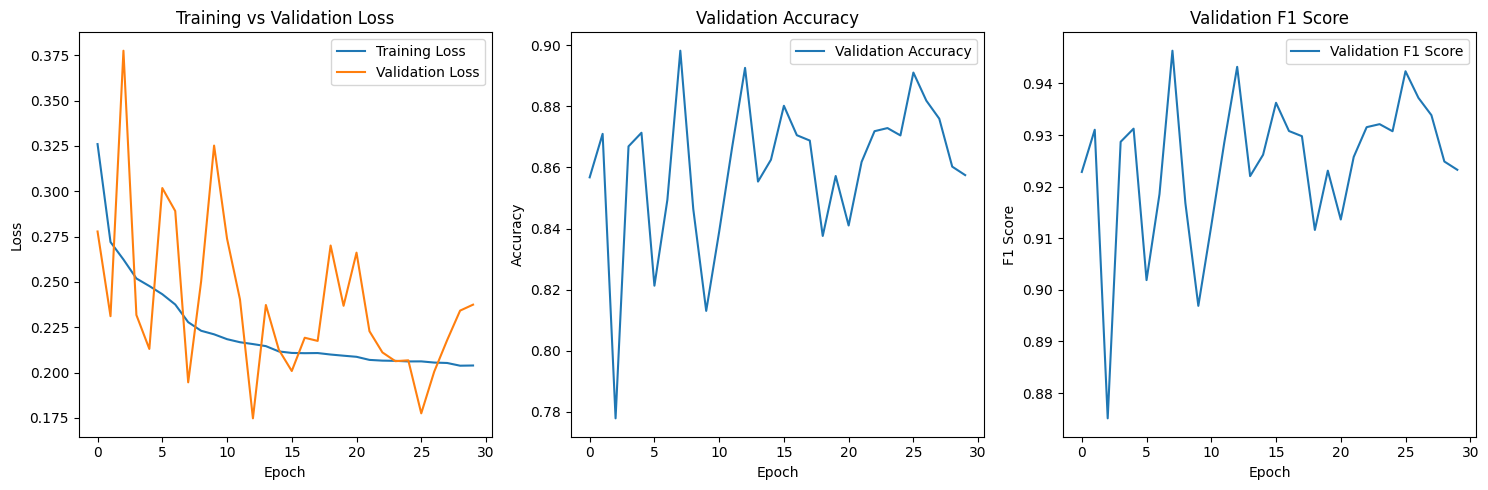

Model saved!


In [12]:
final_model = train_best_model(best_params, train_dataset, val_dataset, test_dataset, y_train_smote)


torch.save(final_model.state_dict(), 'Initial_cnn+bigru_attention_model.pth')
print("Model saved!")
